# Recurrent Neural Network (RNN)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
df = pd.read_csv('../../dataset/RNN/AirPassengers.csv')
data = df['#Passengers'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

print(f'Data shape: {data.shape}')

Data shape: (144, 1)


In [3]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(data_scaled, seq_length)

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print(f'Training shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Training shape: (105, 12, 1)
Test shape: (27, 12, 1)


In [4]:
model = keras.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    layers.LSTM(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)

print('Training completed!')

c:\Users\Tanzil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training completed!


In [5]:
y_pred = model.predict(X_test, verbose=0)
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

MSE: 4673.7328
RMSE: 68.3647


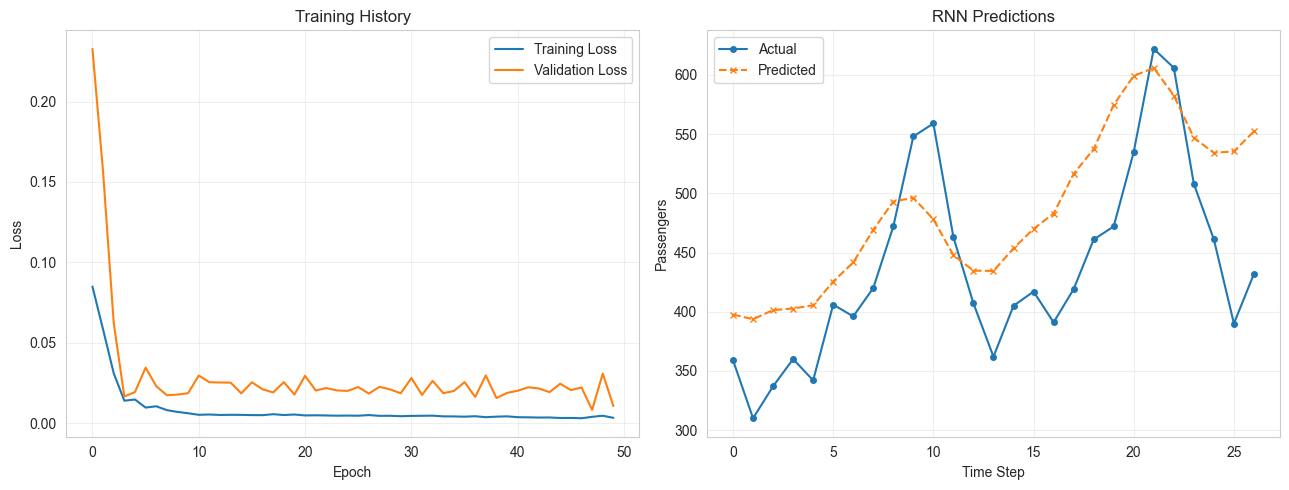

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training History')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(y_test_original, label='Actual', marker='o', markersize=4)
ax2.plot(y_pred, label='Predicted', marker='x', markersize=4, linestyle='--')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Passengers')
ax2.set_title('RNN Predictions')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()